In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns  # package for plotting


from IPython.display import display, HTML  # Make tables pretty
from datetime import datetime


## Import outcomes dataset and tidy up


In [2]:
df = pd.read_csv("jp_outcomes.zip")



In [3]:
# Convert floats to ints to make reporting easier
numerics = ["float64"]
for col in df.select_dtypes(include=numerics).columns:
    if df[col].isnull().sum() == 0:
        # print(col)
        df[col] = df[col].astype("int")
for col in df.columns:
    print(col)



Unnamed: 0
id
cluster
age
duration_days_0
sex
LM_code_rank_P1
occupation_rank_P1
ada_code_rank_P1
family_flag_rank_P1
marital_status_rank_P1
LM_code_rank_P2
occupation_rank_P2
ada_code_rank_P2
family_flag_rank_P2
marital_status_rank_P2
LM_code_rank_P3
occupation_rank_P3
ada_code_rank_P3
family_flag_rank_P3
marital_status_rank_P3
LM_code_rank_P4
occupation_rank_P4
ada_code_rank_P4
family_flag_rank_P4
marital_status_rank_P4
LM_code_rank_P5
occupation_rank_P5
ada_code_rank_P5
family_flag_rank_P5
marital_status_rank_P5
LM_code_rank_P6
occupation_rank_P6
ada_code_rank_P6
family_flag_rank_P6
marital_status_rank_P6
LM_code_rank_P7
occupation_rank_P7
ada_code_rank_P7
family_flag_rank_P7
LM_code_rank_P8
occupation_rank_P8
ada_code_rank_P8
family_flag_rank_P8
marital_status_rank_P7
marital_status_rank_P8
jp_started_P1
jp_started_P2
jp_started_P3
jp_started_P4
jp_started_P5
jp_started_P6
jp_started_P7
jp_started_P8
Cancellationsubcategory
hist_lr_0
total_duration_days
total_sum_penaltyflag
End_Q4

In [4]:
df['test_p'] = df['Group1'].to_string().
df['test_p']


SyntaxError: invalid syntax (<ipython-input-4-0d45bcb79413>, line 2)

In [5]:
# Tidy up T and C columns to make processing easier
for i in range(1, 9):
    df['period_'+str(i)] = df['Group'+str(i)].str.split([0])

    

df.groupby('period_3')['period_4'].sum()



Series([], Name: period_4, dtype: float64)

## Add weights



In [6]:
# def create_ranks (df, sorting_function):
"""
Adds a ranking column to a dataframe based on a sorting function

Given a ranking function and a dataframe with the columns needed for that
ranking function, this function returns a ranking of all the rows.

Parameters
----------
df : DataFrame
    Dataframe with unique index and columns needed for rank_function
sorting_function : function
    A sorting algorithm which returns a sorted version of a given dataframe

Returns
-------
rank : Series
    A pandas series with a unique rank for every row in df

See Also
--------
# List ranking algorithms here!

"""
# # do the actual stuff
df = df.set_index([
    # 'cluster',
    'earn_tot_mean_1315',
    'duration_days_0',
    'id'])
df.sort_index(inplace=True)
df.reset_index(inplace=True)
df.index.name = 'rank'
# # np.sum(df1.index.duplicated())
df.reset_index(inplace=True)
df.set_index('id', inplace=True)

# return rank


In [7]:
# def create_bins (df, bin_method, bin_size, bin_number):
"""
Assigns records to bins, given a ranking and specified number or size of bins



Parameters
----------
df: DataFrame
    Must have T vs C column and ranks
bin_method: String
    "size" or "count"
bin_size: int
    Max or min?
bin_count: int
    Max or min


Returns
-------
bin_col: Series

"""
# # do the actual stuff


'\nAssigns records to bins, given a ranking and specified number or size of bins\n\n\n\nParameters\n----------\ndf: DataFrame\n    Must have T vs C column and ranks\nbin_method: String\n    "size" or "count"\nbin_size: int\n    Max or min?\nbin_count: int\n    Max or min\n\n\nReturns\n-------\nbin_col: Series\n\n'

In [8]:
df_T = df.loc[df["Group1"] == "T1"].copy()
df_C = df.loc[df["Group1"] == "C1"].copy()

df_T["t_centile"], bins = pd.qcut(
    df_T["rank"], 100, retbins=True, labels=False)

df_C["t_centile"] = pd.cut(df_C["rank"], bins, labels=range(len(bins) - 1))
# return bin_col


# def add_weights ()
"""Create T, C, and X groups for all periods
# In:       Whatever we've got already
# Out:     [periods (1, 0, -)]


# def get_weights_all_periods:
# In:       df [periods] [weighting cols] weighting_score_fn, bin_fn
# Out:     [period weight columns]

# def get_weights:
# In:      period, [weighting_cols], weighting_score_fn, bin_fn
# Out:     weight, t_bin

"""
# 	1. Create ranks
# 	2. Create T and C bins based on ranks
# 	3. Add weights
t_count = df_T["t_centile"].count()
t_centile_weights = df_T.groupby(["t_centile"])[
    "rank"].count().divide(t_count)
df_T["weight"] = 1
c_count = df_C["t_centile"].count()

c_t_centile_weights = df_C.groupby(
    ["t_centile"])["t_centile"].count().divide(c_count)
c_weights = t_centile_weights / c_t_centile_weights
df_C["weight"] = df_C["t_centile"].map(c_weights)

df = df_T.append(df_C)


## Create weighted versions of background and outcome columns

In [9]:
numeric_cols = [
    col for col in df.columns.tolist() if col.startswith(("earn_", "sw_pay_"))
]

for col in numeric_cols:
    df["w_" + col] = df[col] * df["weight"]

w_numeric_cols = ["w_" + col for col in numeric_cols]
for col in numeric_cols:
    df[w_numeric_cols] = df[w_numeric_cols].astype(int)


ValueError: Cannot convert non-finite values (NA or inf) to integer

In [10]:
df["sw_pay_diff"] = df["sw_pay_2017"] - df["sw_pay_mean_1315"]
df["earn_tot_diff"] = df["earn_tot_2017"] - df["earn_tot_mean_1315"]
df["income_diff"] = df["sw_pay_diff"] + df["earn_tot_diff"]

df["w_sw_pay_diff"] = df["w_sw_pay_2017"] - df["w_sw_pay_mean_1315"]
df["w_earn_tot_diff"] = df["w_earn_tot_2017"] - df["w_earn_tot_mean_1315"]
df["w_income_diff"] = df["w_sw_pay_diff"] + df["w_earn_tot_diff"]



In [11]:
df["w_impact_earn_tot_mean_1315"] = (
    df["w_earn_tot_mean_1315"] - df["earn_tot_mean_1315"]
)
df["w_impact_earn_tot_2017"] = df["w_earn_tot_2017"] - df["earn_tot_2017"]
df["w_impact_earn_tot_diff"] = df["w_earn_tot_diff"] - df["earn_tot_diff"]

df["w_impact_sw_pay_mean_1315"] = df["w_sw_pay_mean_1315"] - df["sw_pay_mean_1315"]
df["w_impact_sw_pay_2017"] = df["w_sw_pay_2017"] - df["sw_pay_2017"]
df["w_impact_sw_pay_diff"] = df["w_sw_pay_diff"] - df["sw_pay_diff"]

df["w_impact_income_diff"] = df["w_income_diff"] - df["income_diff"]


## Descriptive statistics


In [12]:
# import sklearn.cross_validation.Bootstrap as bootstrap
# import scipy
# for col in w_numeric_cols:
#     print(col,
#     df.groupby('Group1')[col].apply(
#         lambda x:bootstrap.ci(data=x, statfunction=scipy.mean)))


### Weighting impact


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E18000FEF0>,
      dtype=object)

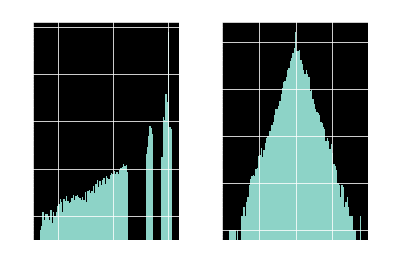

In [13]:
df[["w_impact_sw_pay_mean_1315", "w_impact_earn_tot_mean_1315"]].hist(
    bins=100, log=True
)


[]

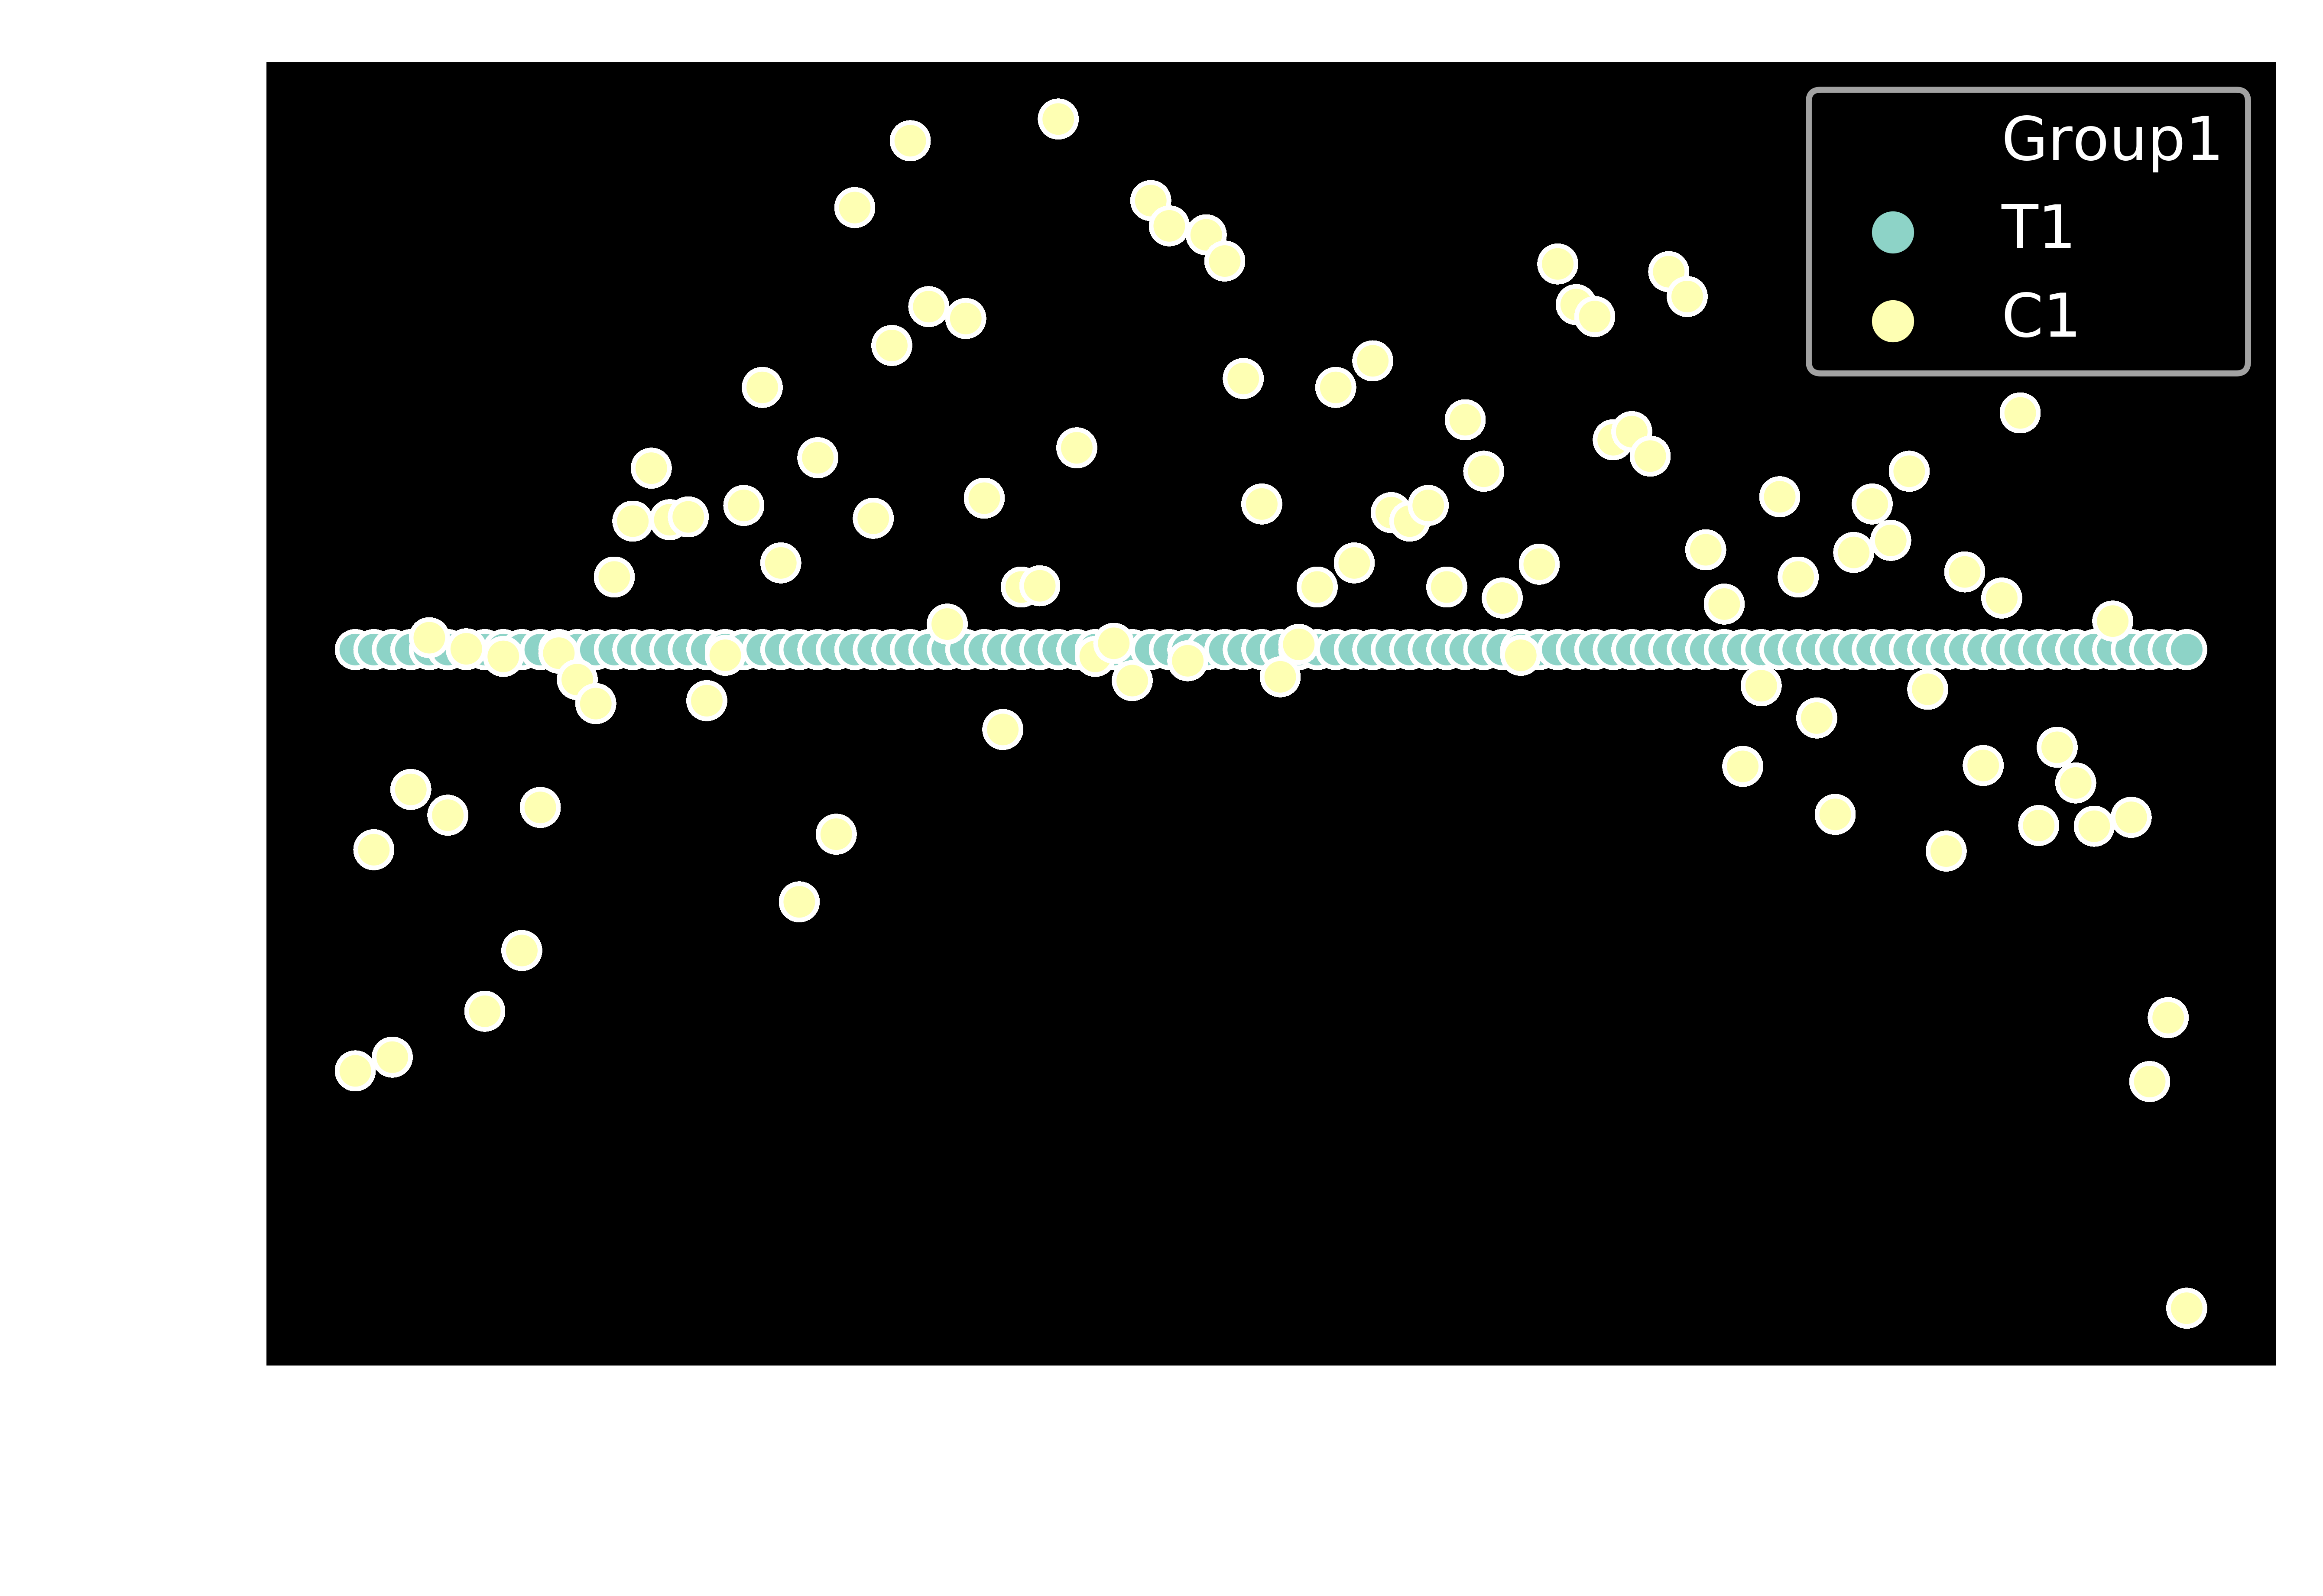

In [14]:
f, ax = plt.subplots(dpi=1000)
sns.scatterplot(x="t_centile", y="weight", hue="Group1", data=df)
fig = ax.get_figure()
fig.savefig("images/weights_by_centile.png")
ax.plot()


### Previous earnings analysis


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

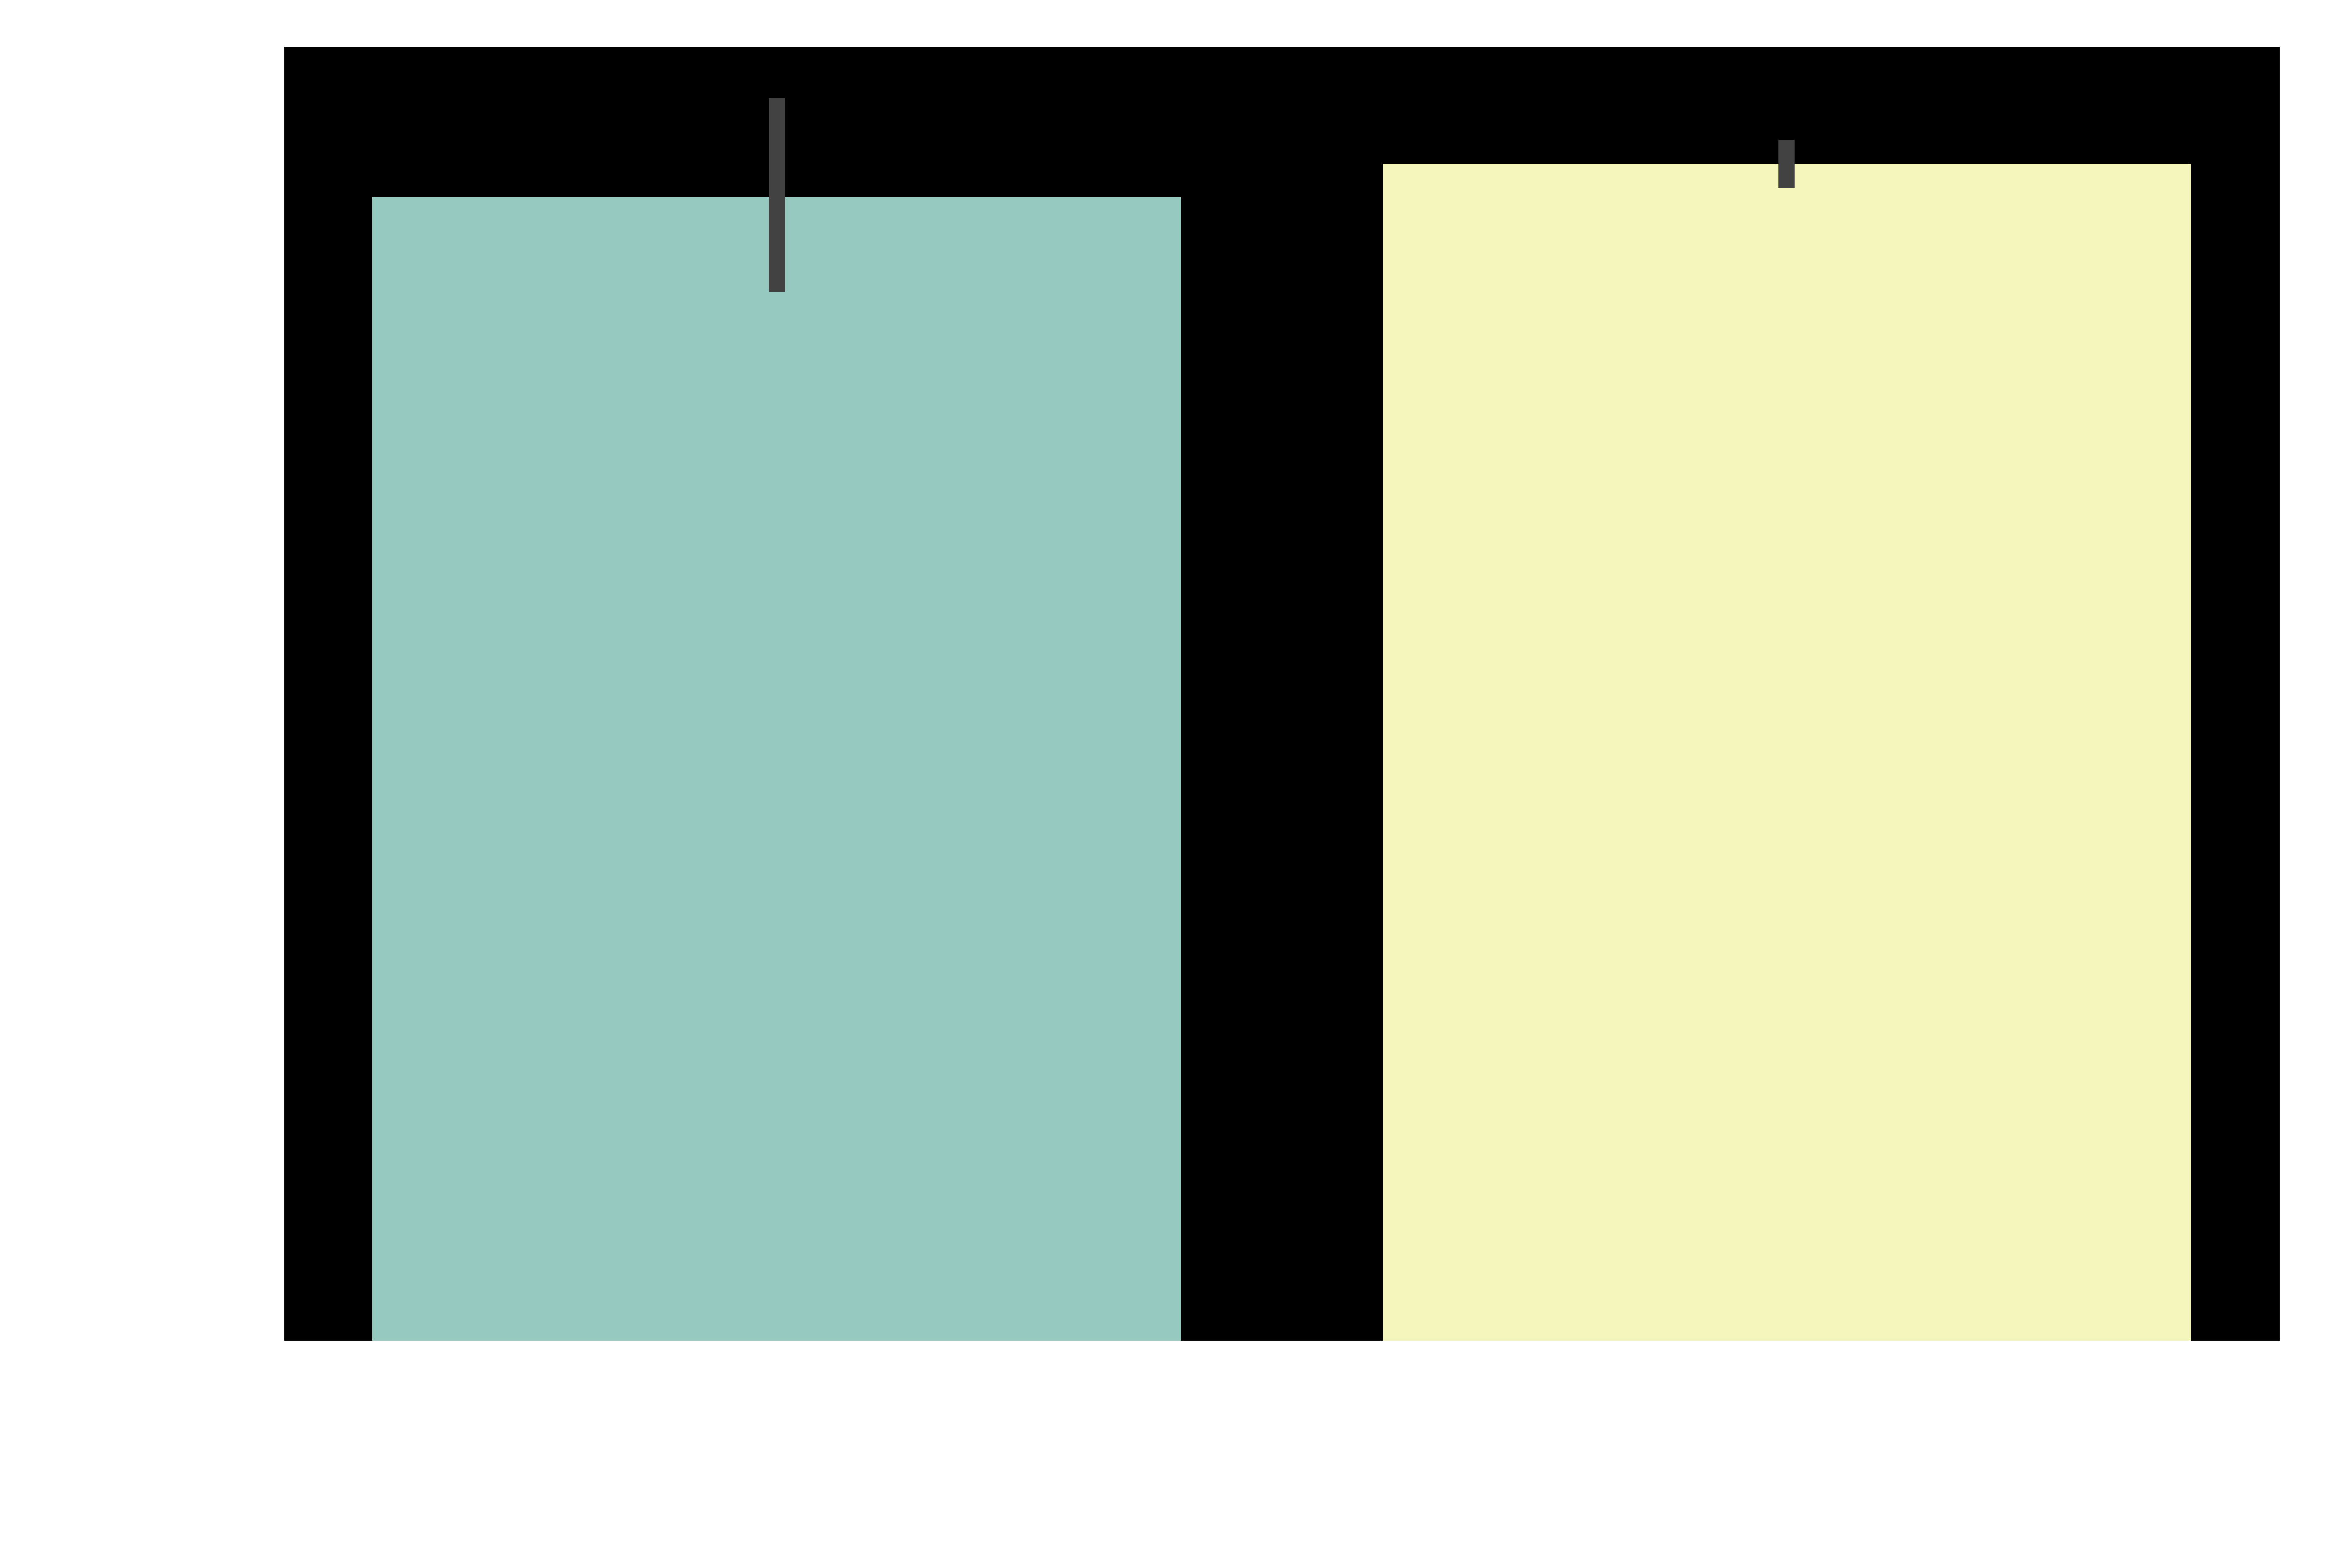

In [15]:
f, ax = plt.subplots(dpi=1000)
ax = sns.barplot(x="Group1", y="w_earn_tot_mean_1315", data=df)
# ax.set_yscale('symlog')
fig = ax.get_figure()
fig.savefig("images/earn_1315_by_group.png")
ax.plot()


[]

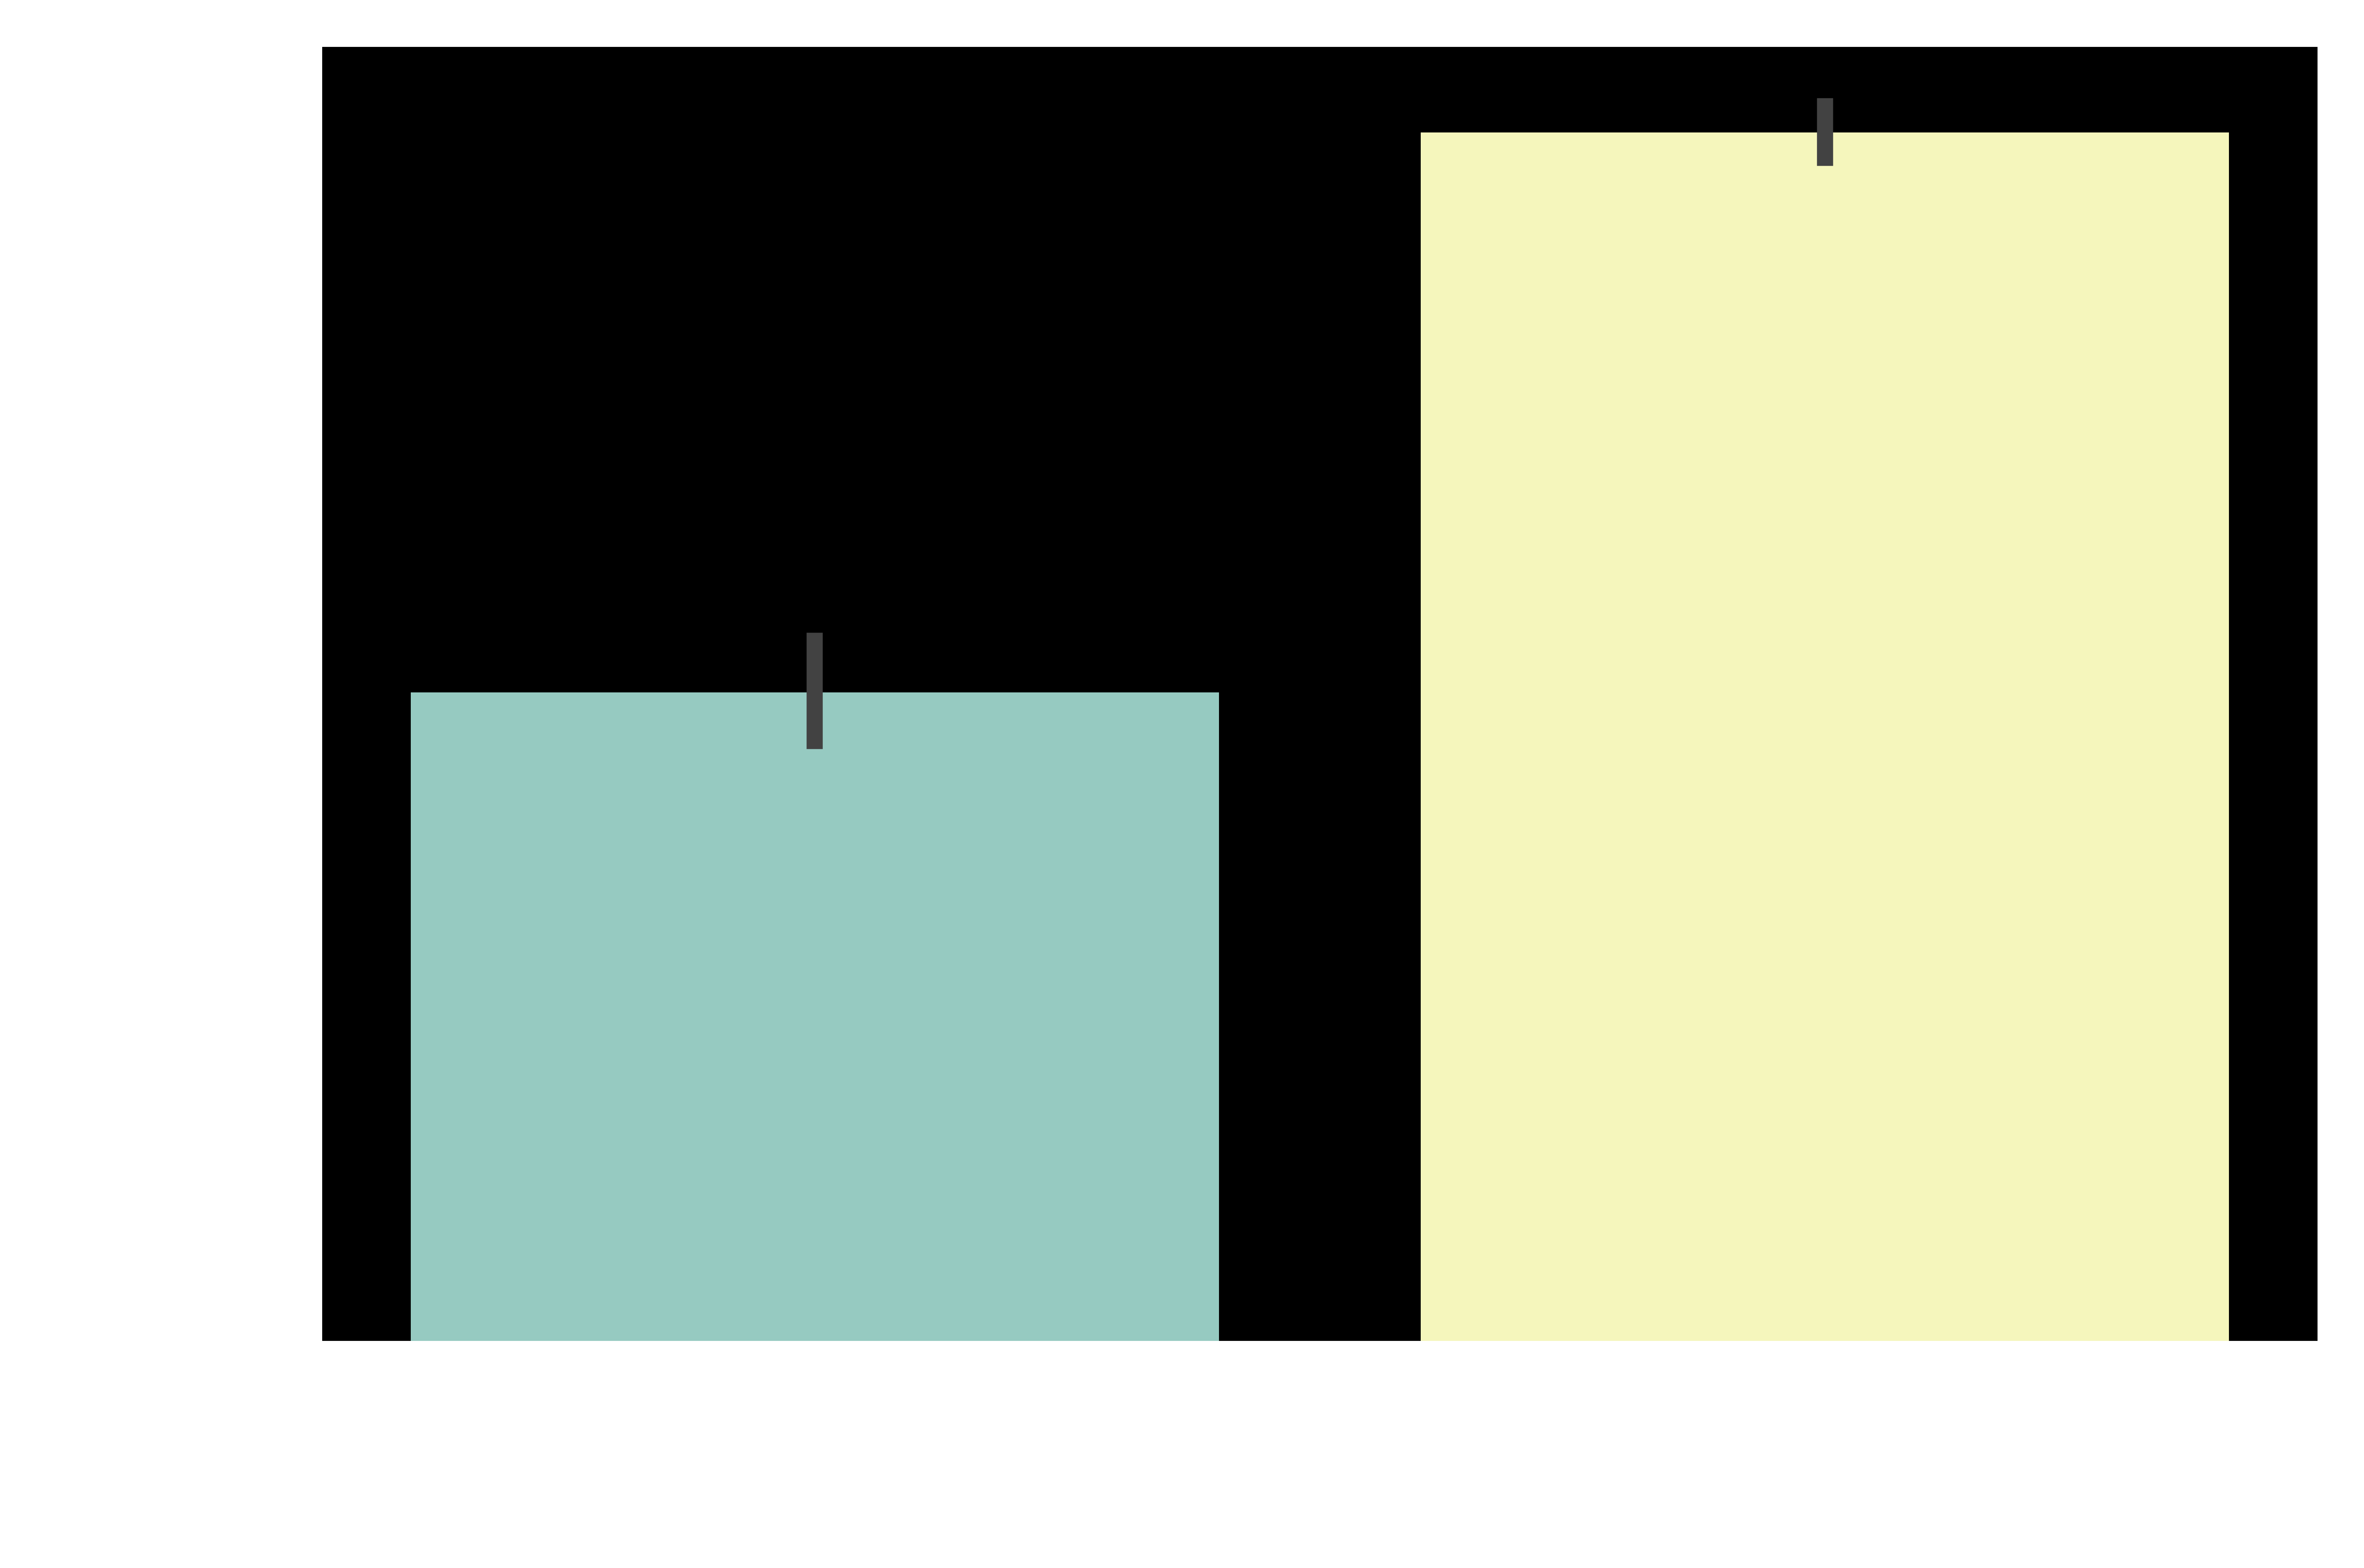

In [16]:
f, ax = plt.subplots(dpi=1000)
ax = sns.barplot(x="Group1", y="earn_tot_mean_1315", data=df)
# ax.set_yscale('symlog')
fig = ax.get_figure()
fig.savefig("images/unweighted_earn_1315_by_group.png")
ax.plot()


[]

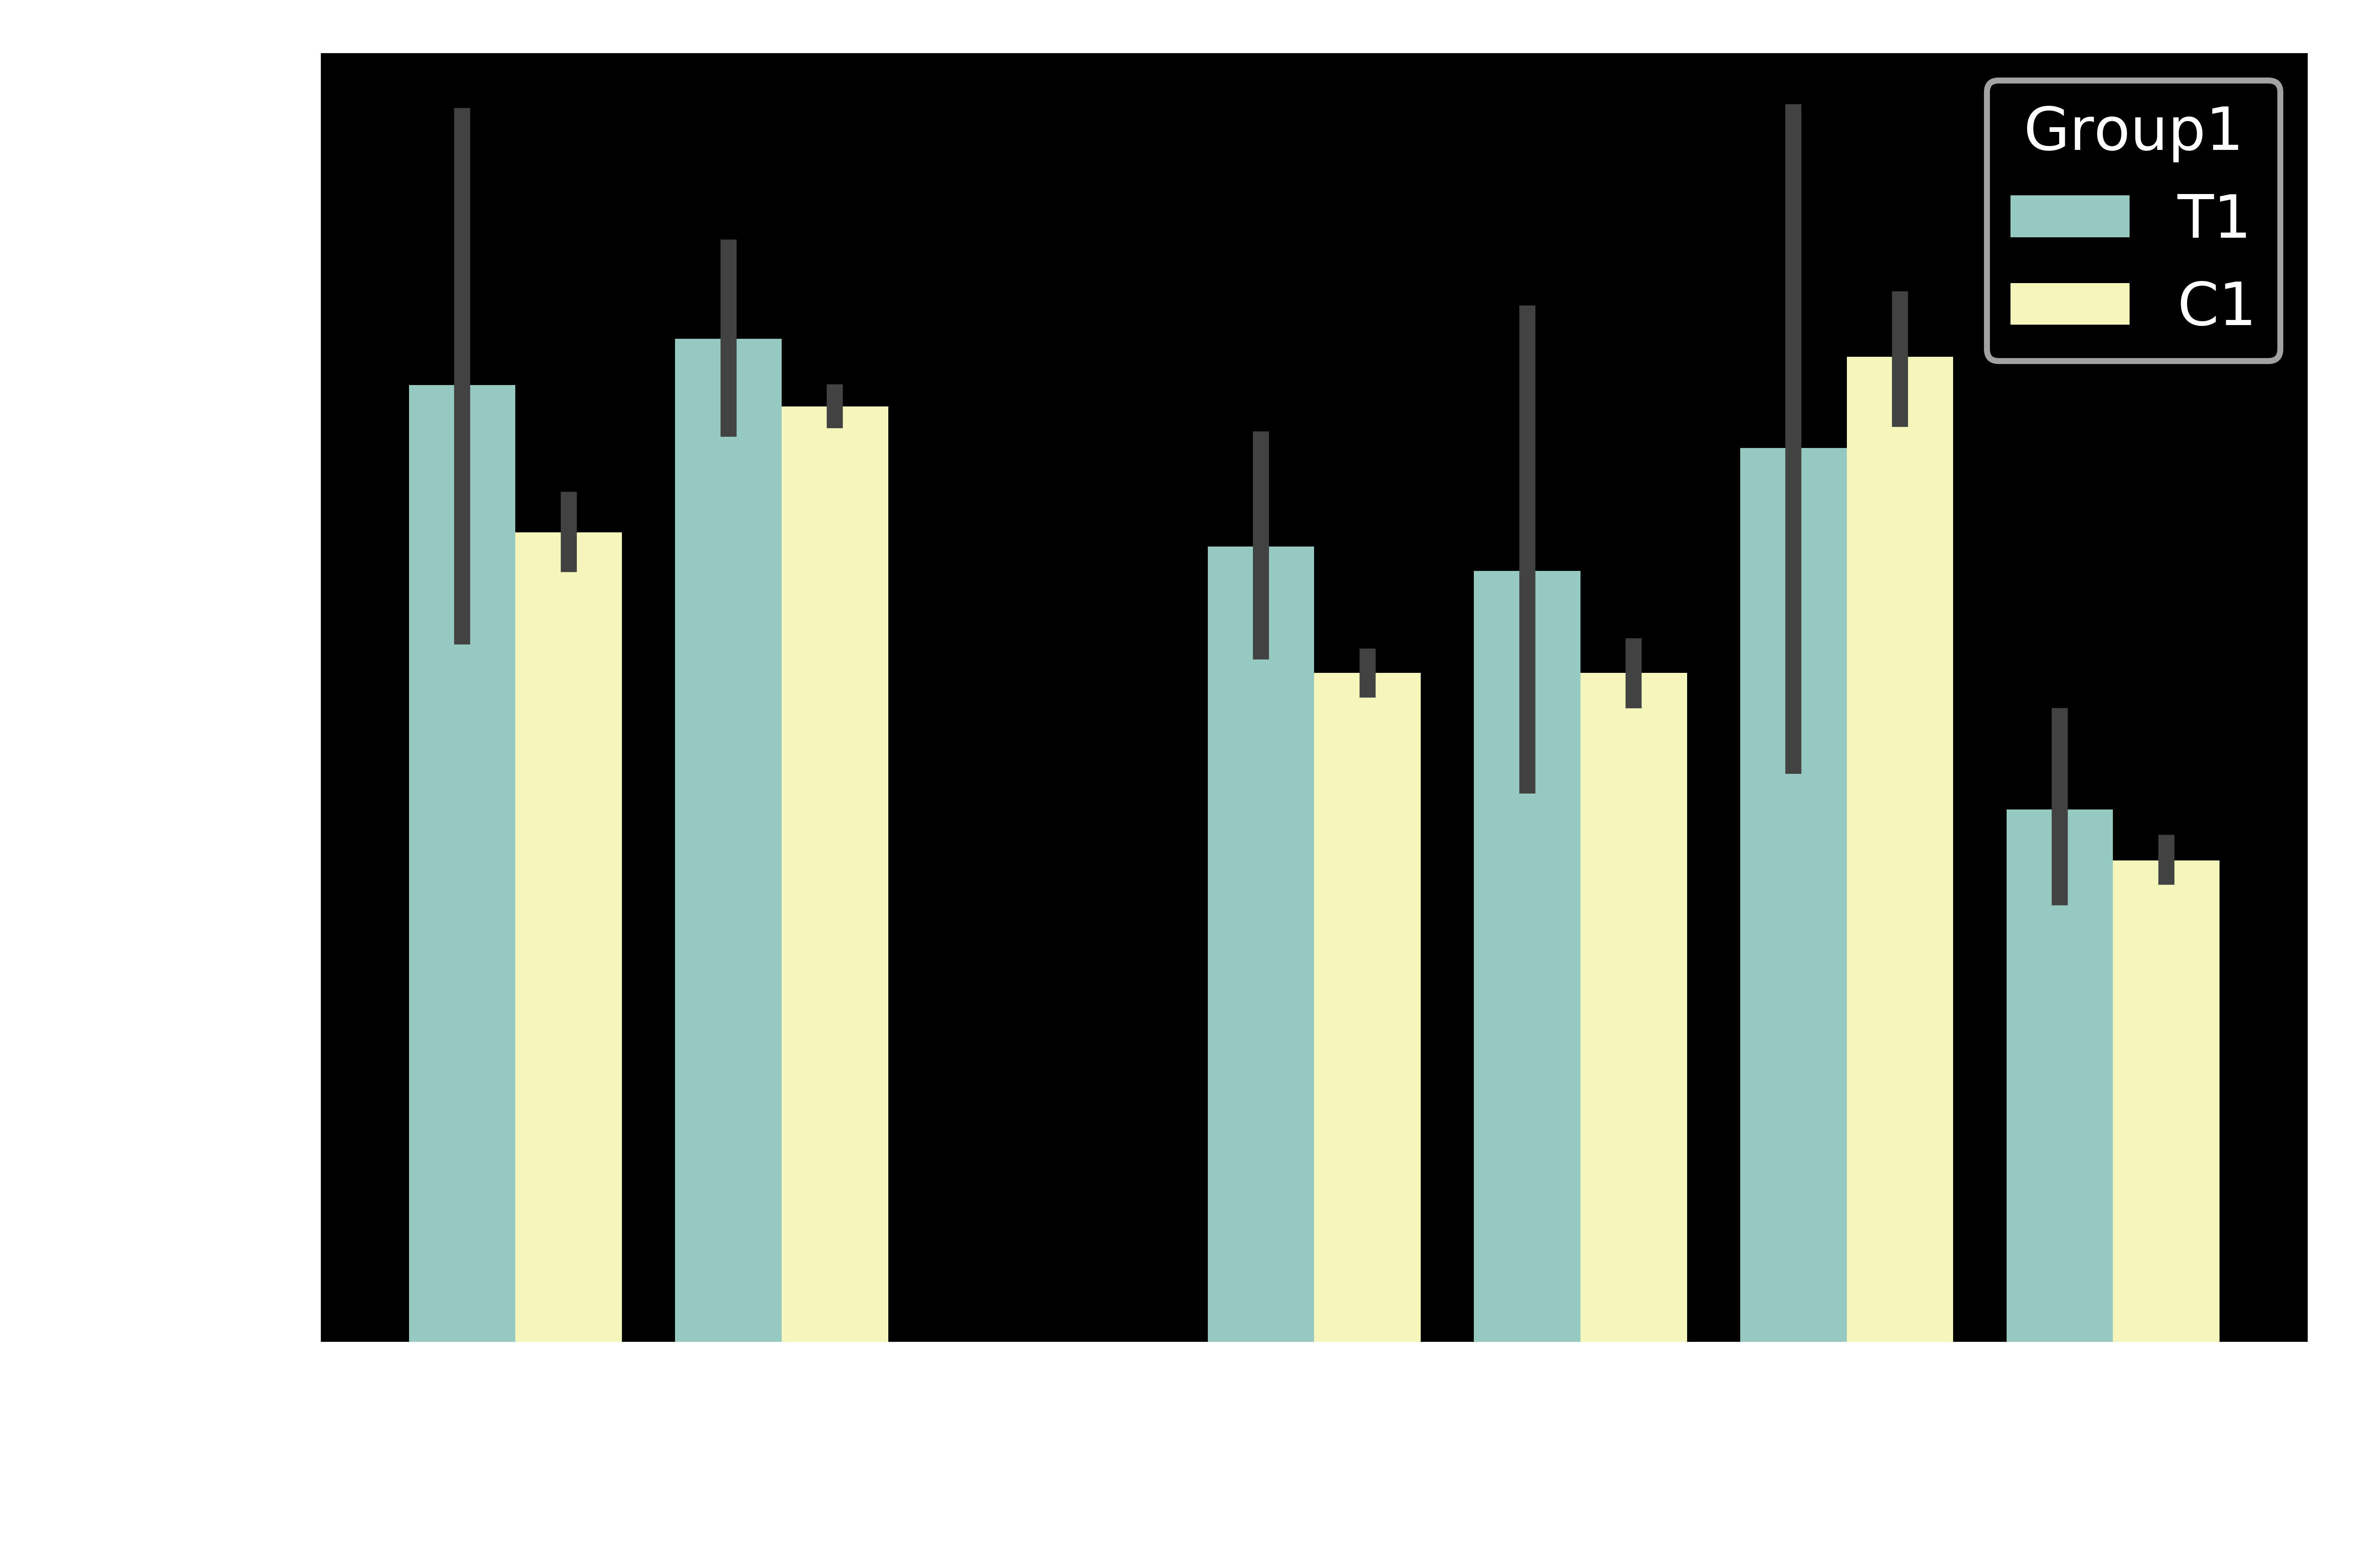

In [17]:
f, ax = plt.subplots(dpi=1000)
ax = sns.barplot(x="cluster", y="w_earn_tot_mean_1315", hue="Group1", data=df)
# ax.set_yscale('symlog')
fig = ax.get_figure()
fig.savefig("images/earn_1315_by_cluster_group.png")
ax.plot()


[]

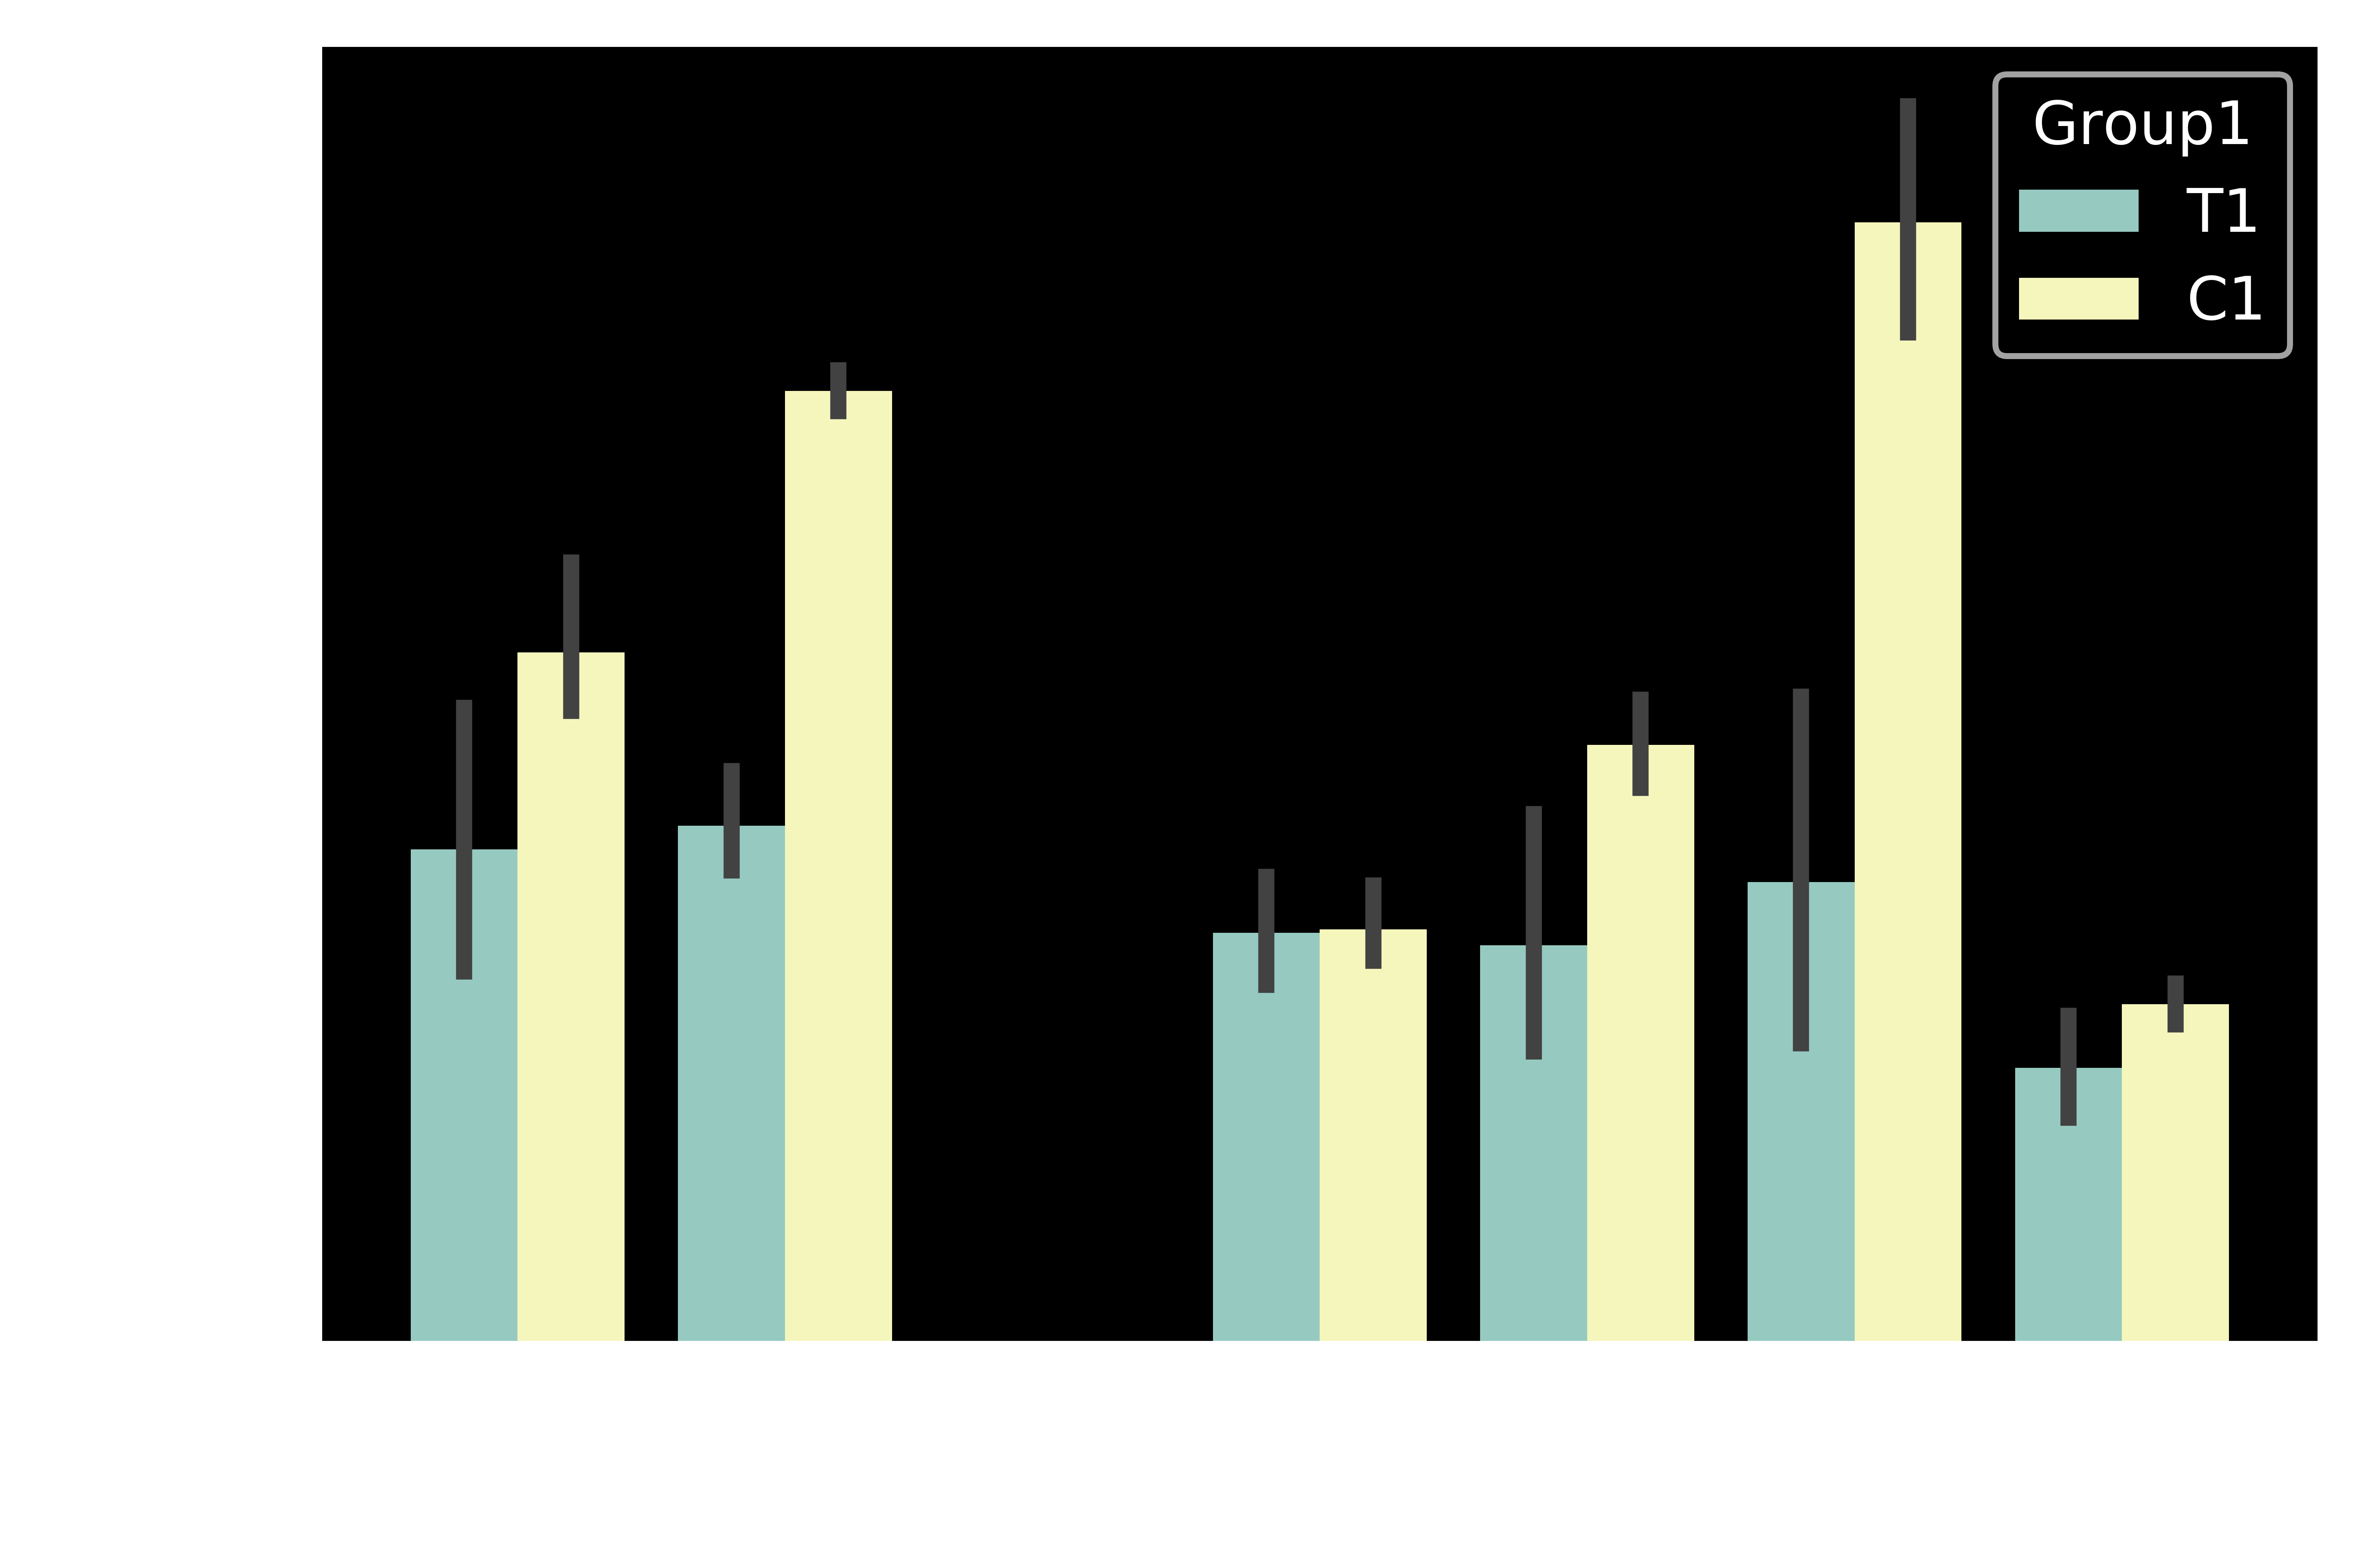

In [20]:
f, ax = plt.subplots(dpi=1000)
ax = sns.barplot(x="cluster", y="earn_tot_mean_1315", hue="Group1", data=df)
# ax.set_yscale('symlog')
fig = ax.get_figure()
fig.savefig("images/unweighted_earn_1315_by_cluster_group.png")
ax.plot()


### Previous social welfare payment analysis


[]

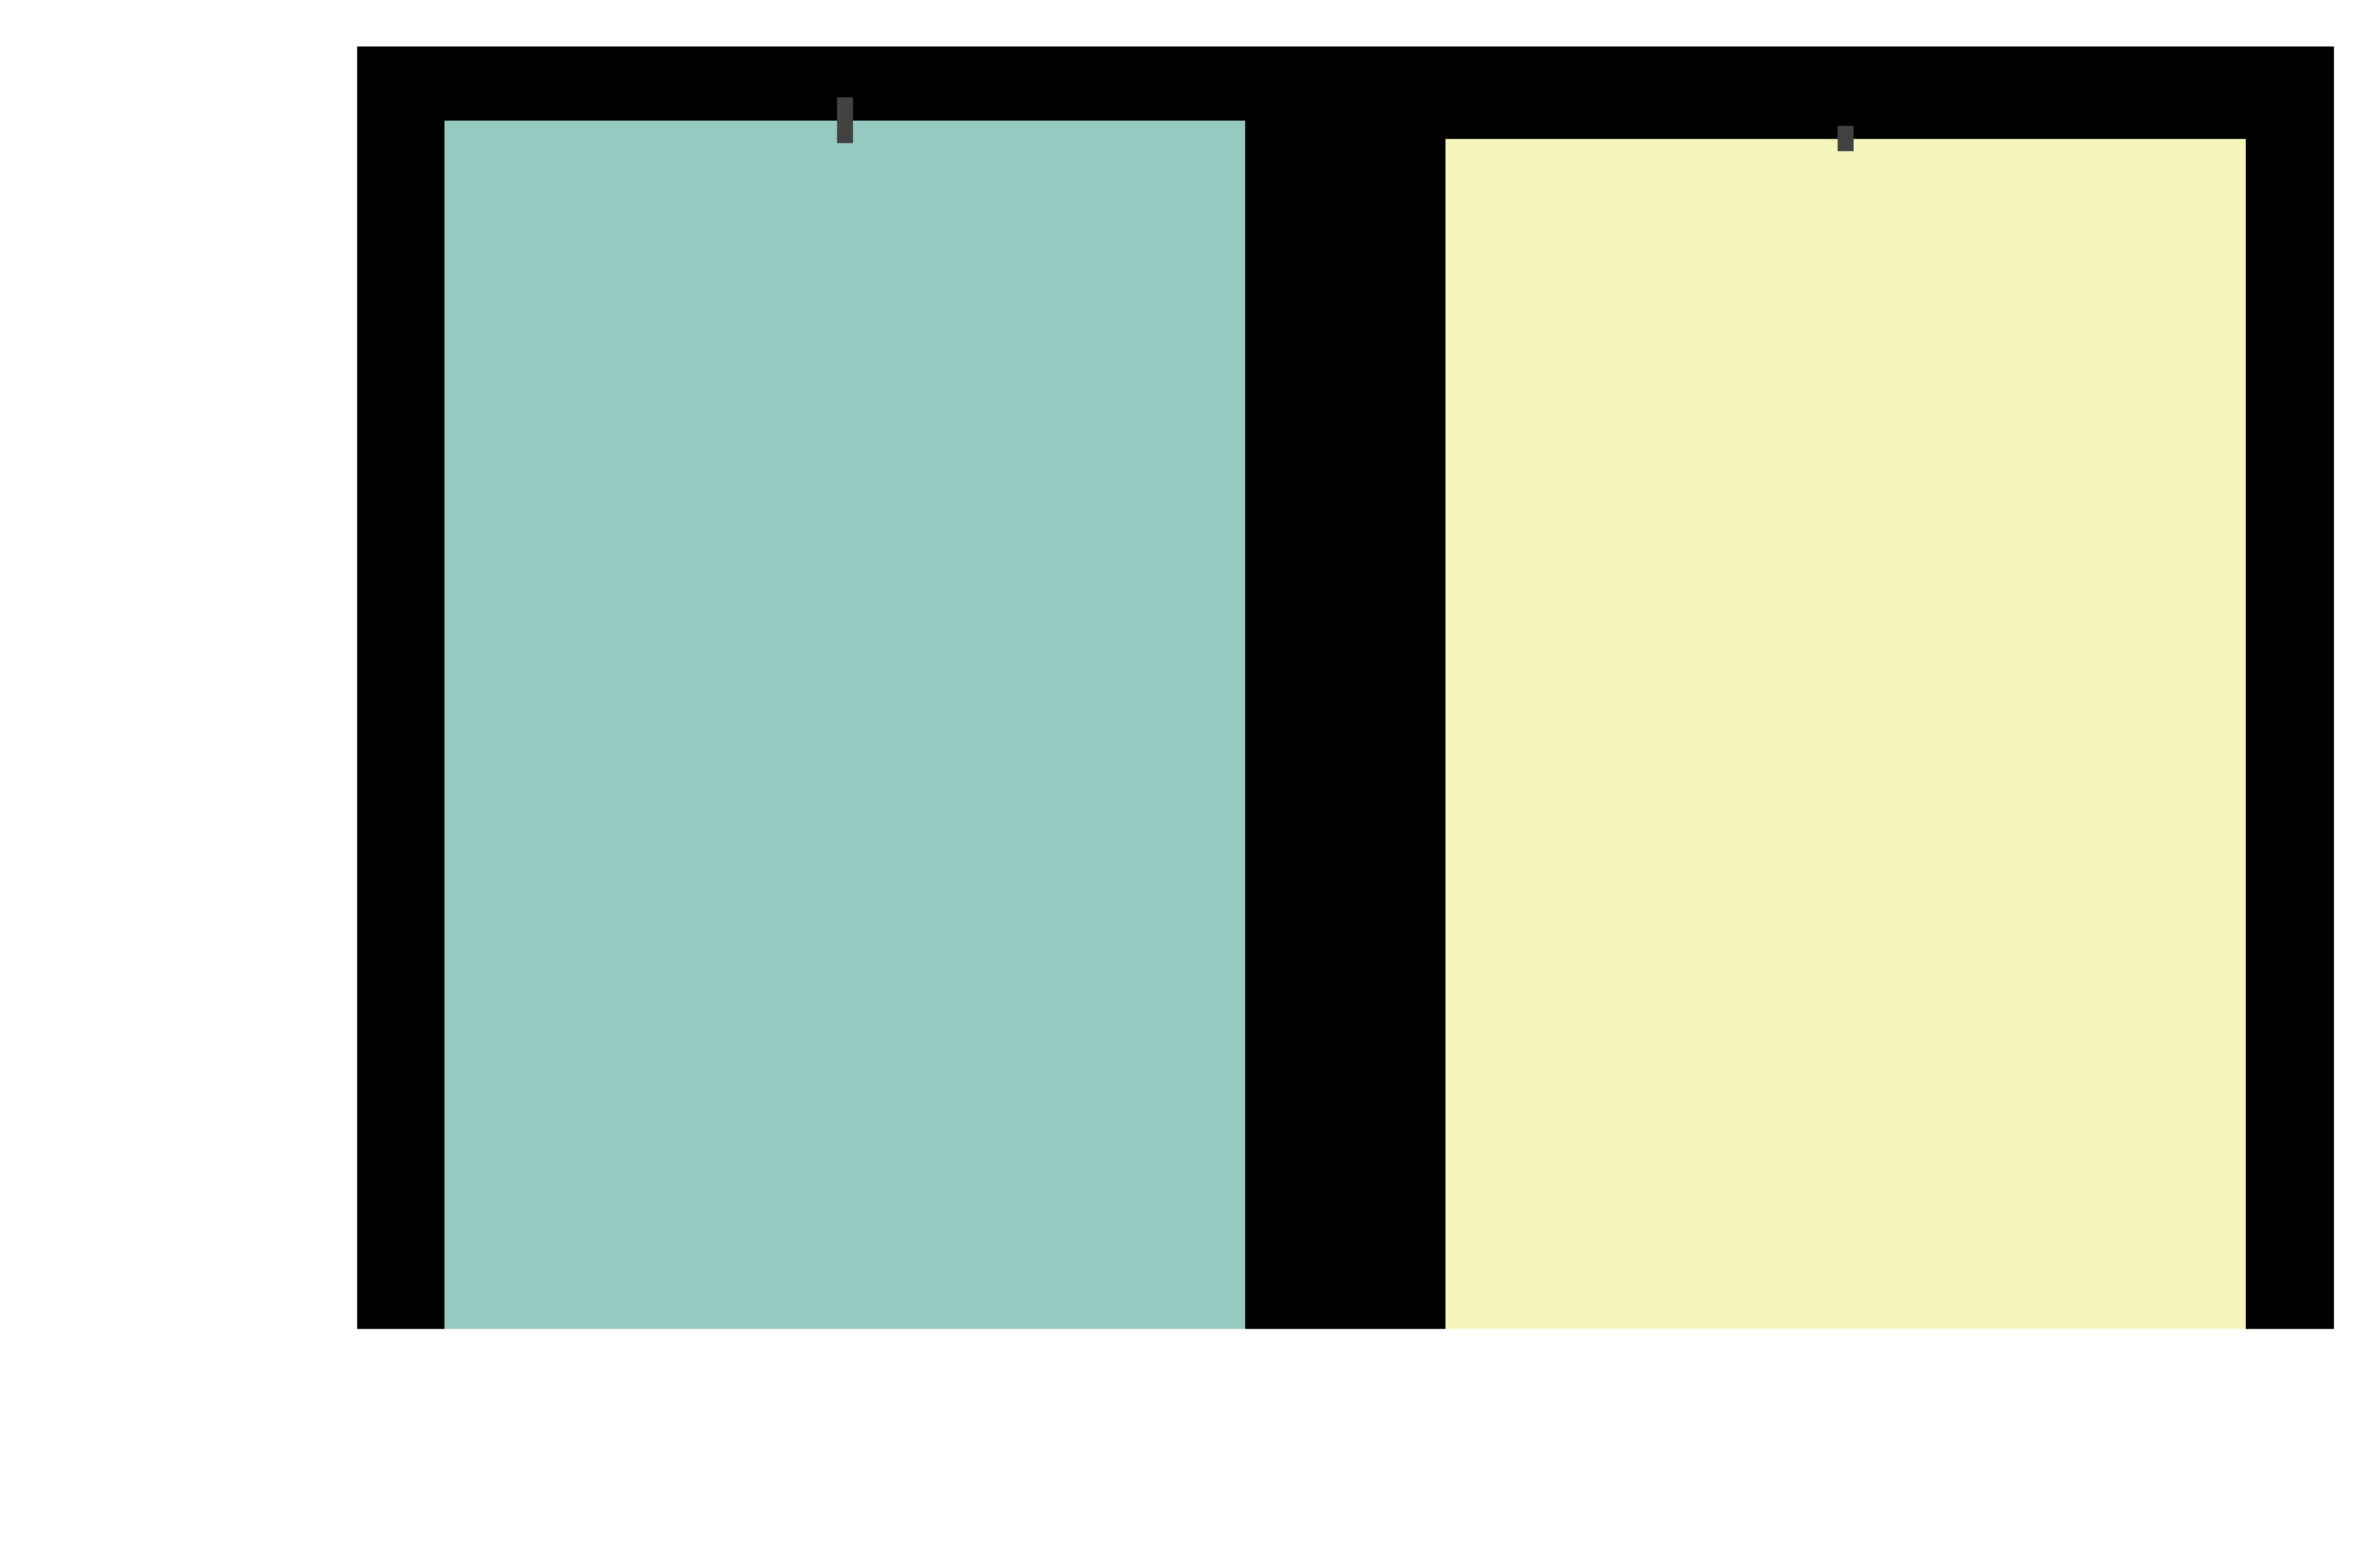

In [18]:
f, ax = plt.subplots(dpi=1000)
ax = sns.barplot(x="Group1", y="w_sw_pay_mean_1315", data=df)
# ax.set_yscale('symlog')
fig = ax.get_figure()
fig.savefig("images/sw_pay_1315_by_group.png")
ax.plot()


[]

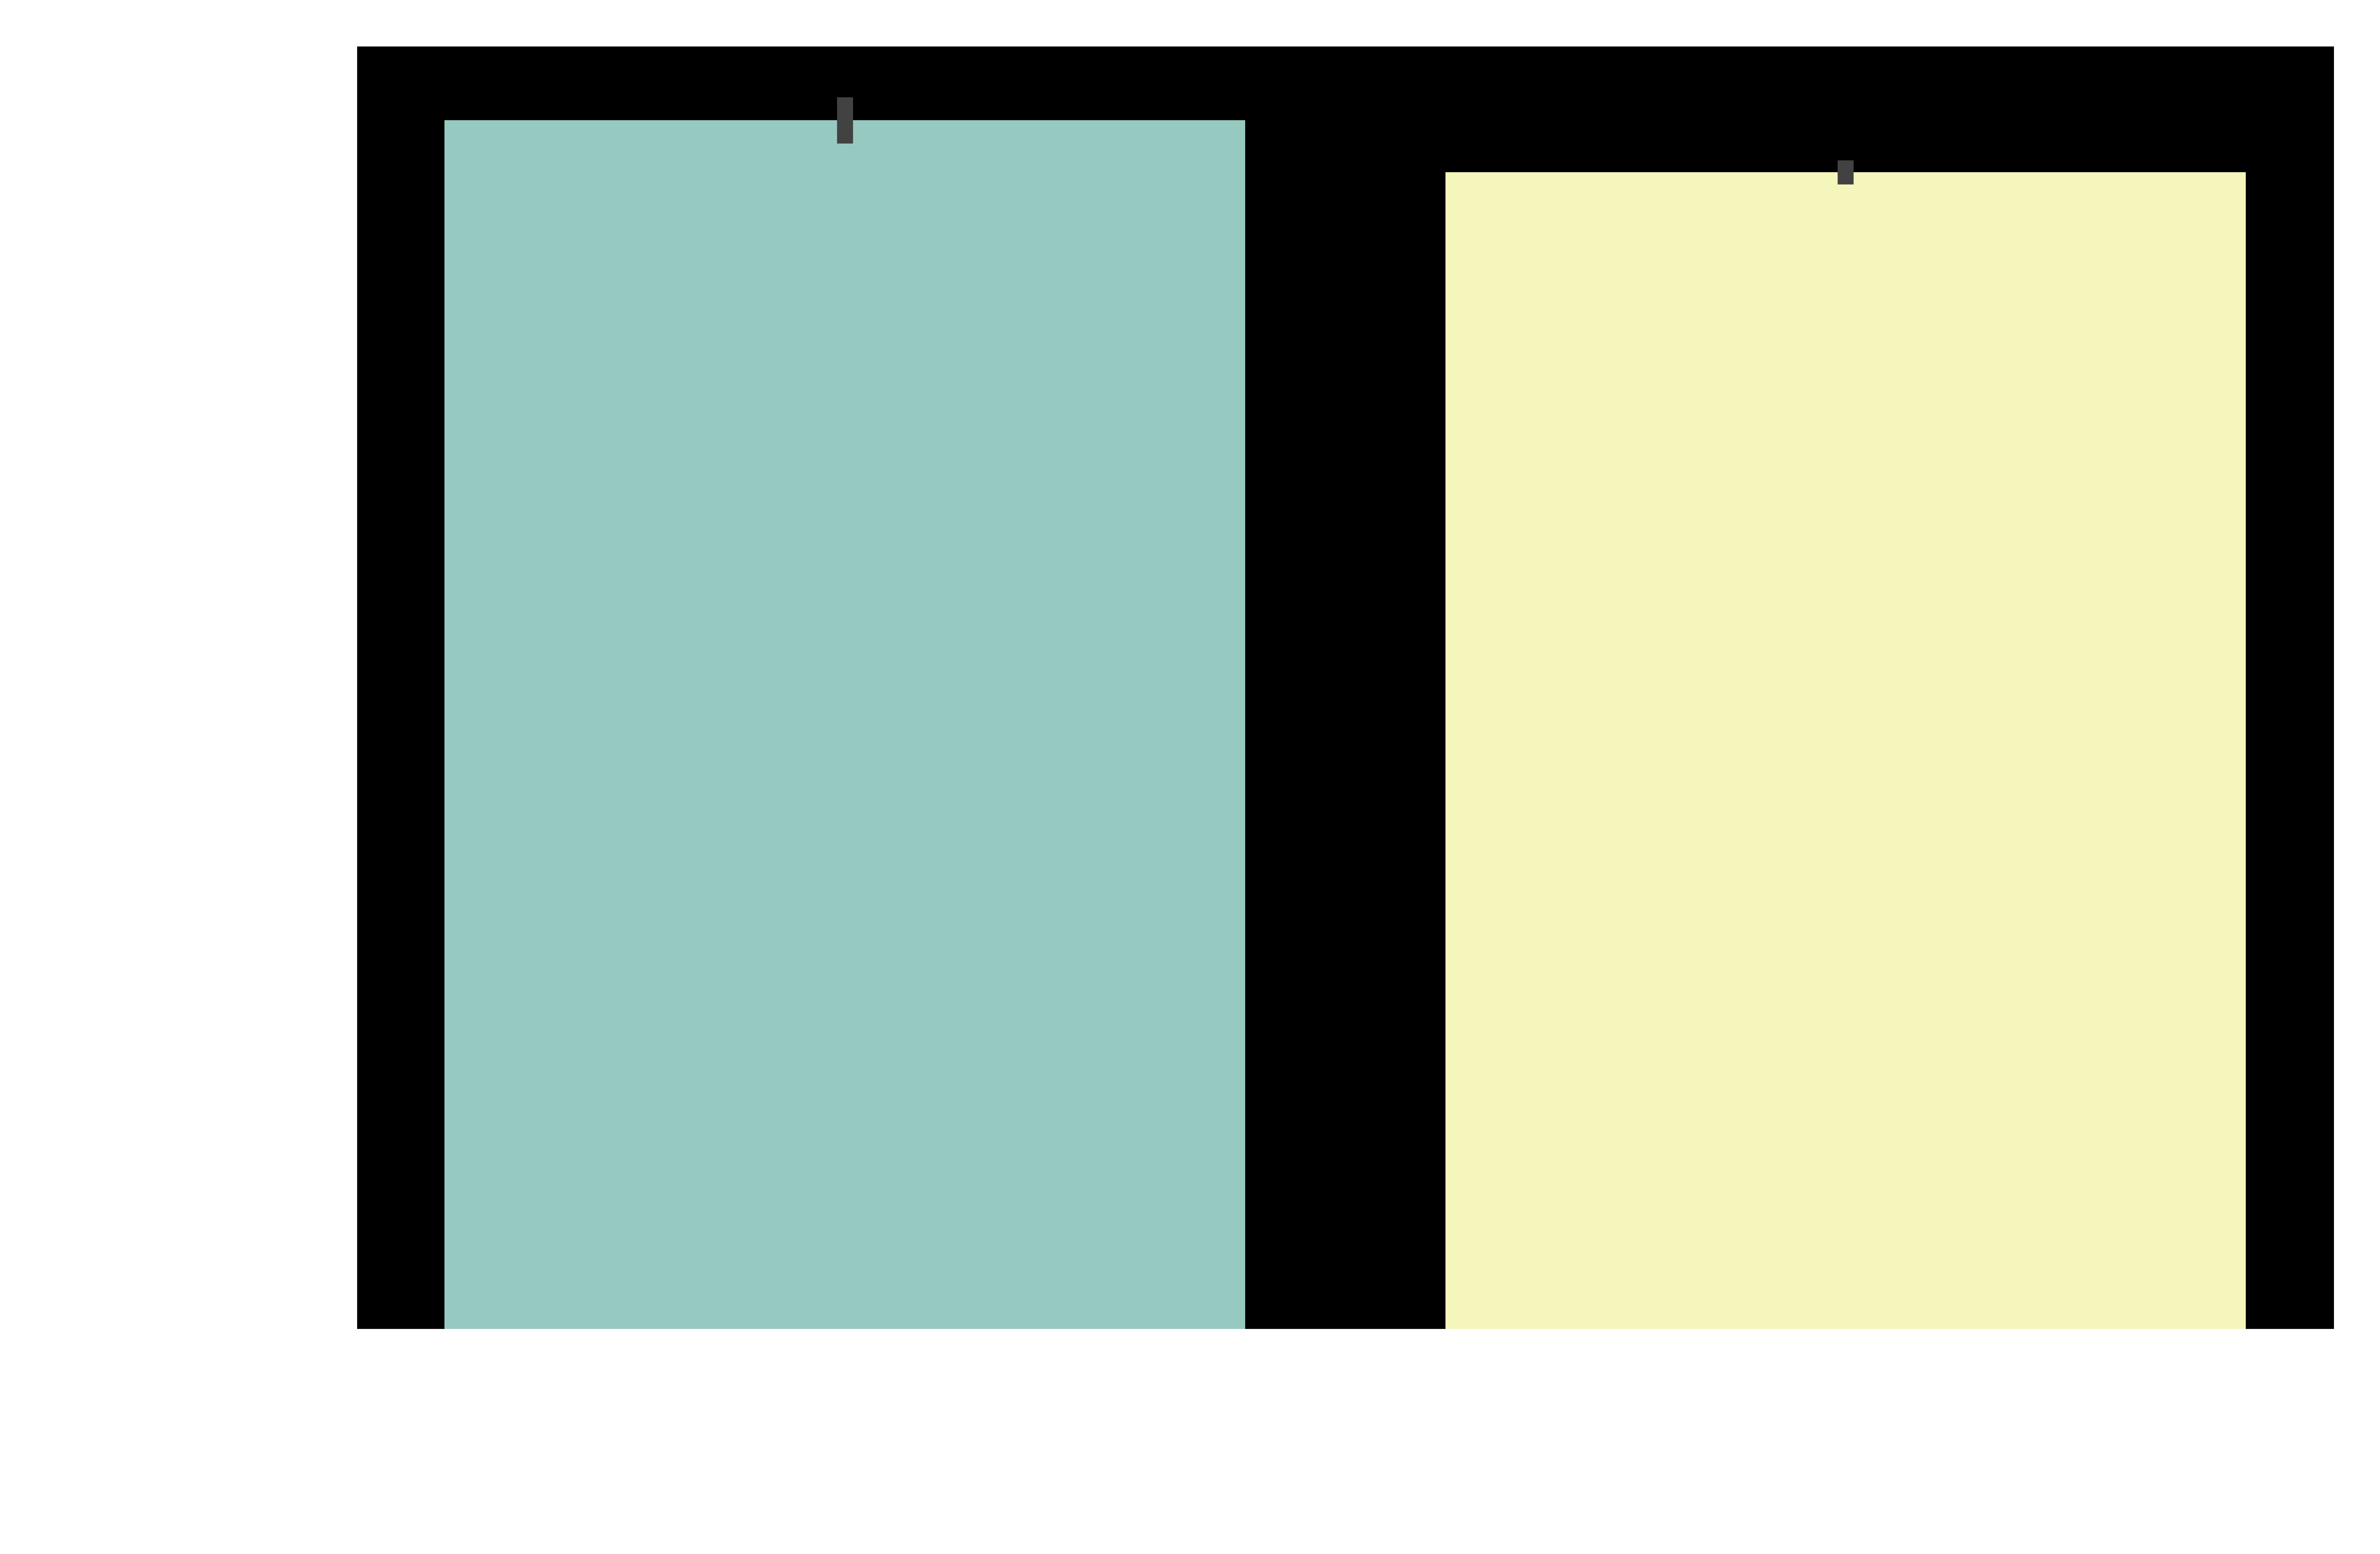

In [19]:
f, ax = plt.subplots(dpi=1000)
ax = sns.barplot(x="Group1", y="sw_pay_mean_1315", data=df)
# ax.set_yscale('symlog')
fig = ax.get_figure()
fig.savefig("images/unweighted_sw_pay_1315_by_group.png")
ax.plot()
